In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('housing.csv')

# Training and Testing Sets

In [4]:
# np.random.seed(206)
np.random.permutation(10)

array([8, 1, 9, 4, 0, 2, 3, 5, 6, 7])

In [5]:
def split_train_test(data, test_ratio, seed = 206):
    np.random.seed(seed)
    n = len(data)
    train_size = int(n * (1-test_ratio))
    # test_size = n - train_size

    shuffled_indices = np.random.permutation(n)

    train_indices = shuffled_indices[:train_size]
    test_indices = shuffled_indices[train_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(housing, 0.2)

In [7]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=206)

train_set.shape, test_set.shape

((16512, 10), (4128, 10))

# Predictors and Label

In [9]:
# label
housing_label = train_set['median_house_value'].copy()

# predictors
housing_X = train_set.drop('median_house_value', axis=1)

In [10]:
housing_X.shape

(16512, 9)

# Handle NAs

In [11]:
housing_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16343 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Method 1: Delete rows

In [12]:
housing_X_dropna = housing_X.dropna(subset=['total_bedrooms'])
housing_X_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16343 entries, 13219 to 7957
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16343 non-null  float64
 1   latitude            16343 non-null  float64
 2   housing_median_age  16343 non-null  float64
 3   total_rooms         16343 non-null  float64
 4   total_bedrooms      16343 non-null  float64
 5   population          16343 non-null  float64
 6   households          16343 non-null  float64
 7   median_income       16343 non-null  float64
 8   ocean_proximity     16343 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


## Method 2: Delete the column

In [13]:
housing_X_dropna_cal = housing_X.drop('total_bedrooms', axis=1)
housing_X_dropna_cal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [14]:
housing_X.shape

(16512, 9)

## Method 3: Set NA as median

In [15]:
housing_X_2 = housing_X.copy()

median = housing_X_2['total_bedrooms'].median()
median

434.0

In [16]:
housing_X_2['total_bedrooms'].fillna(median, inplace=True)

In [17]:
housing_X_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


# Text and Categorical Variables

In [18]:
housing_X_2['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7262
INLAND        5289
NEAR OCEAN    2117
NEAR BAY      1841
ISLAND           3
Name: count, dtype: int64

In [19]:
housing_X_2['ocean_proximity']

13219    NEAR OCEAN
429          INLAND
6261     NEAR OCEAN
7413      <1H OCEAN
8565         INLAND
            ...    
6602         INLAND
14398     <1H OCEAN
15524     <1H OCEAN
18898        INLAND
7957         INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat = housing_X_2[['ocean_proximity']]

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [21]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [22]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [23]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Transformation and Scaling

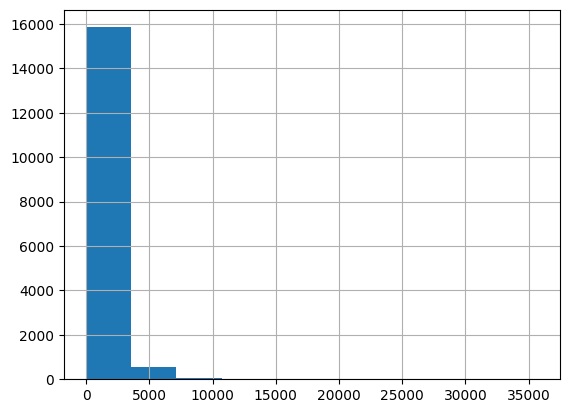

In [25]:
housing_X_2['population'].hist()
plt.show()

In [29]:
housing_X_2_num = housing_X_2.drop('ocean_proximity', axis=1)
housing_X_2_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [30]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_X_2_num)

# housing_num_min_max_scaled

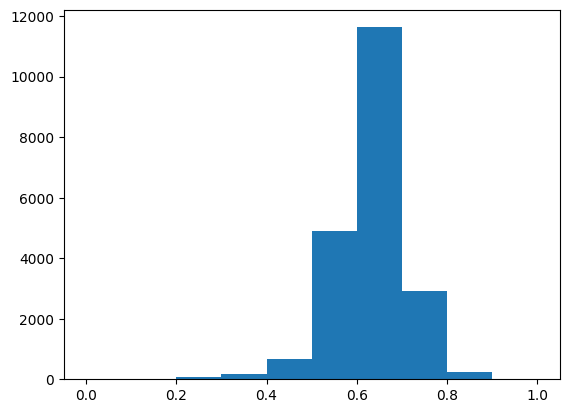

In [27]:
min_max_scaler_pop = MinMaxScaler(feature_range=(0, 1))

# log transformation, then min_max scaling
pop_min_max_scaled = min_max_scaler_pop.fit_transform(housing[['population']].apply(np.log))

plt.hist(pop_min_max_scaled)
plt.show()

Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

pop =  housing_X_2[['population']]
# log transformation
pop_log = np.log(pop)

# standardization scaling
## fit
std_scaler.fit(pop_log)
## get mean and std 
print(std_scaler.mean_, std_scaler.scale_ )
## transformation
pop_std_scaled = std_scaler.transform(pop_log)

## or we can do fit and transformation together
pop_std_scaled = std_scaler.fit_transform(pop_log)

[7.02653802] [0.73729109]


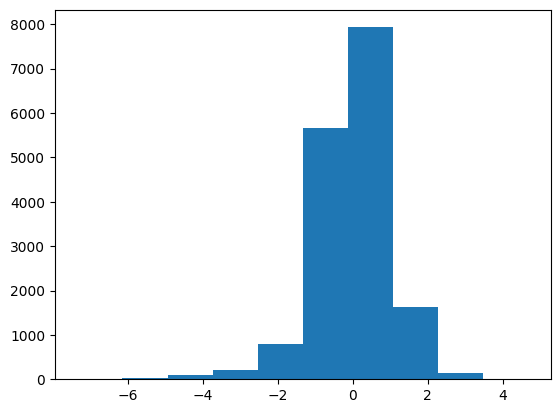

In [50]:
plt.hist(pop_std_scaled)
plt.show()

# Transformation Pipelines

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy='median') ),
        ("standardize", StandardScaler())
    ]
)

housing_num_prepared = num_pipeline.fit_transform(housing_X_2_num)

housing_num_prepared.shape


(16512, 8)

Numerical and Categorical attributes

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attributes = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'
]
cat_attributes = ['ocean_proximity']

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

housing_prepared = preprocessing.fit_transform(housing)


In [64]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [69]:
housing_prepared[:2,:]

array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.9744286 , -0.97703285,  2.34476576,  2.12963148,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         0.86143887,  1.66996103,  2.33223796,  1.31415614,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ]])